# HotDog: Calories and Sodium

## Description

Results of a laboratory analysis of calories and sodium content of major hot dog brands. 
Researchers for Consumer Reports analyzed three types of hot dog: beef, poultry, and meat 
(mostly pork and beef, but up to 15% poultry meat).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from scipy.stats import linregress 


In [3]:

url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_012708_ID_Data_HotDogs'

df = pd.read_html(url)[1]

df = df.reindex(df.index.drop(0))
df[[1,2]] = df[[1,2]].astype(float)
df[0] = df[0].astype(str)
df.columns = ['type','calories','sodium']

# saved to csv 
#df.to_csv("C:\\Users\\Nehe\\Documents\\hotdog.csv")


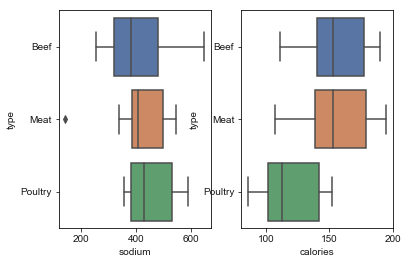

In [4]:

# box plots 
fig, ax = plt.subplots(1,2)
sns.set(style="whitegrid")

sns.boxplot(data=df,x='sodium',y='type', ax =ax[0])
sns.boxplot(data=df,x='calories',y='type', ax=ax[1])
plt.show()


### TODO -

* explain what the box plots show

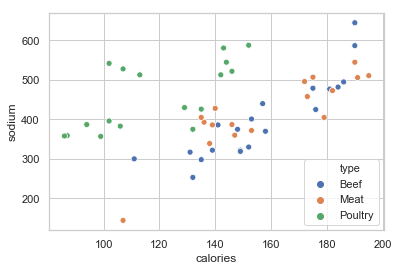

In [4]:
sns.scatterplot(data=df,x='calories',y='sodium', hue='type')
#sns.lmplot(data=df,x='calories',y='sodium',col='type',hue='type')
plt.show()
# TODO - Neaten 4 graph output, add titles (matplot 4 axes)

### TODO -

* Comment on the relationship between sodium and calories
* implement linear regression test 


In [5]:
beef,meat,poultry = df.loc[0:20], df.loc[21:37], df.loc[38:]

In [6]:
# transform the 3 data frames to numpy arrays rows corresponding to type, sodium, calories respectively.
np_beef = beef.T.values
np_poultry = poultry.T.values
np_meat = meat.T.values

## Simple Linear Regression Methods

In [7]:
# Method: sklearn.linear_model.LinearRegression()
# Most popular method for data scientists
# requires numpy array for variables

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

for type in np_beef, np_poultry, np_meat:
    fit = model.fit(type[1].reshape(-1,1), type[2].reshape(-1,1)), 
    score = model.score(type[1].reshape(-1,1), type[2].reshape(-1,1))
    print('Type: ', type[0][0], '\n'
          'Score: ' ,score, '\n'
          'Coefficient: ', model.coef_ , '\n'
          'Intercept: ', model.intercept_, '\n'
    )



Type:  Beef 
Score:  0.7869228258148608 
Coefficient:  [[4.01326927]] 
Intercept:  [-228.33128519] 

Type:  Poultry 
Score:  0.438061431742501 
Coefficient:  [[2.48701655]] 
Intercept:  [163.63021037] 

Type:  Meat 
Score:  0.745464834395291 
Coefficient:  [[3.21169366]] 
Intercept:  [-91.18526515] 



In [ ]:
#Linear regression using stats.linregress
# Method: Stats.linregress()
for type in np_beef, np_poultry, np_meat:
    (a_s,b_s,r,tt,stderr) = linregress(type[1],type[2]) 
    print('Type: ', type'\n'
        'a=%.2f, b=%.2f, std error= %.3f, r^2 coefficient= %.5f' % (a_s,b_s,stderr,r), '\n')

In [11]:
"""
# Method: Statsmodels.OLS ( )
print('Linear regression using statsmodels.OLS \n\n')

for type in beef, poultry, meat:
    X = sm.add_constant(type['sodium'])
    model = sm.OLS(type['calories'], X)
    results = model.fit()
    print(results.summary())
    
"""

"\n# Method: Statsmodels.OLS ( )\nprint('Linear regression using statsmodels.OLS \n\n')\n\nfor type in beef, poultry, meat:\n    X = sm.add_constant(type['sodium'])\n    model = sm.OLS(type['calories'], X)\n    results = model.fit()\n    print(results.summary())\n    \n"

In [12]:
# Classification
## Support Vector Machine

In [ ]:
"""
from sklearn import svm

X = df.values[:,[1,2]] # calories, sodium
type = {'Beef':0,'Meat':1,'Poultry':2}
y = [type[item] for item in df['type']]

svc = svm.SVC(kernel='linear', C=1.0).fit(X,y)

x_min, x_max = X[:,0].min() -1, X[:,0].max() +1
y_min, y_max = X[:,1].min() -1, X[:,1].max() +1
h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min,x_max, h),
                     np.arange(y_min,y_max, h))

X_plot = np.c_[xx.ravel(), yy.ravel()]
Z = svc.predict(X_plot)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVC with linear kernel')
plt.xlabel('calories')
plt.ylabel('sodium')
plt.show()

"""